In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [6]:
print(os.getcwd())

# List files in current directory
print(os.listdir())

C:\Users\User\Intrenship
['.ipynb_checkpoints', 'archive.zip', 'Day 3.ipynb', 'Day1 Internship.ipynb', 'Day2.ipynb', 'Housing.csv', 'Internship.ipynb', 'Titanic-Dataset.csv', 'titanic_pipeline_rf.joblib', 'titanic_preprocessor.joblib']


In [8]:
df = pd.read_csv("Housing.csv")
print(df.shape)
print(df.head())

(545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [51]:
X = df[["area"]]      # Example: area (square ft) as predictor
y = df["price"]       
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
print("\n--- DataFrame info ---")
display(df.info())
print("\n--- Missing values ---")
display(df.isnull().sum())



--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None


--- Missing values ---


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [63]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 970043.40
MSE: 1754318687330.67
R²: 0.65


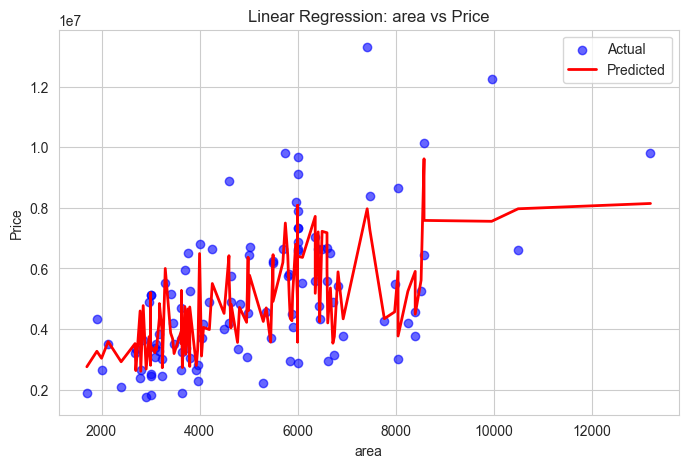

In [76]:
#  Plot regression line


feature_column = X_test.columns[0]  # Use the name of the feature

# Convert the feature to NumPy array if it’s a DataFrame
X_feature = X_test[feature_column].to_numpy()

# Sort for smooth line
sorted_idx = np.argsort(X_feature)
X_sorted = X_feature[sorted_idx]
y_test_sorted = y_test[sorted_idx]  # No .to_numpy(), y_test is already a NumPy array
y_pred_sorted = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_sorted, y_test_sorted, color="blue", alpha=0.6, label="Actual")
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Predicted")
plt.xlabel(feature_column)
plt.ylabel("Price")
plt.title(f"Linear Regression: {feature_column} vs Price")
plt.legend()
plt.show()






In [54]:
# Interpret coefficients
print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])
print("\nInterpretation: For every additional 1 sq ft area, price increases by β₁ units (holding other factors constant).")

Intercept (β₀): 2512254.2639593435
Slope (β₁): 425.72984193878284

Interpretation: For every additional 1 sq ft area, price increases by β₁ units (holding other factors constant).


In [15]:
## Exploratory Data Analysis (EDA)
# Summary statistics
print("\n--- Summary statistics ---")
display(df.describe(include='all').T)


--- Summary statistics ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Using target column: price


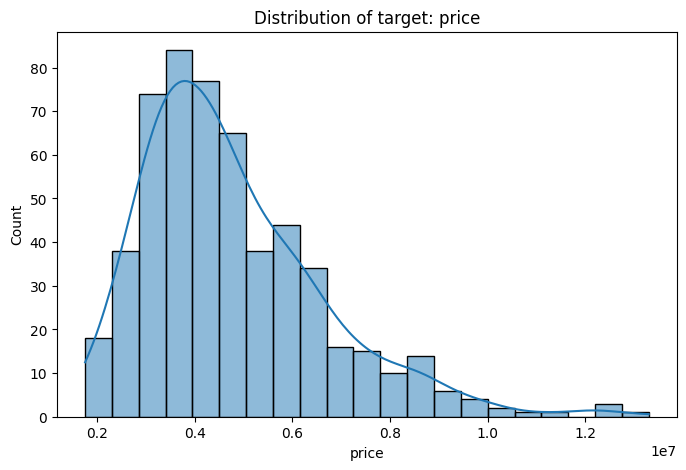

In [16]:
# Visualize target distribution (assume target column is 'price' or similar)
# Try to detect the target column automatically if possible:
possible_targets = [c for c in df.columns if c.lower() in ['price','target','saleprice','median_house_value','house_value']]
if len(possible_targets) == 0:
    # fall back to last numeric column
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols)>0:
        target = numeric_cols[-1]
    else:
        raise ValueError("No numeric columns found to use as target. Please set the target variable manually.")
else:
    target = possible_targets[0]

print(f"\nUsing target column: {target}")

plt.figure(figsize=(8,5))
sns.histplot(df[target].dropna(), kde=True)
plt.title(f"Distribution of target: {target}")
plt.show()


In [61]:
#  BASELINE LINEAR REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

def regression_metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

print("Baseline Metrics:", regression_metrics(y_test, y_pred))


Baseline Metrics: {'MAE': 970043.4039201644, 'MSE': 1754318687330.6692, 'RMSE': np.float64(1324506.9600914407), 'R2': 0.6529242642153174}


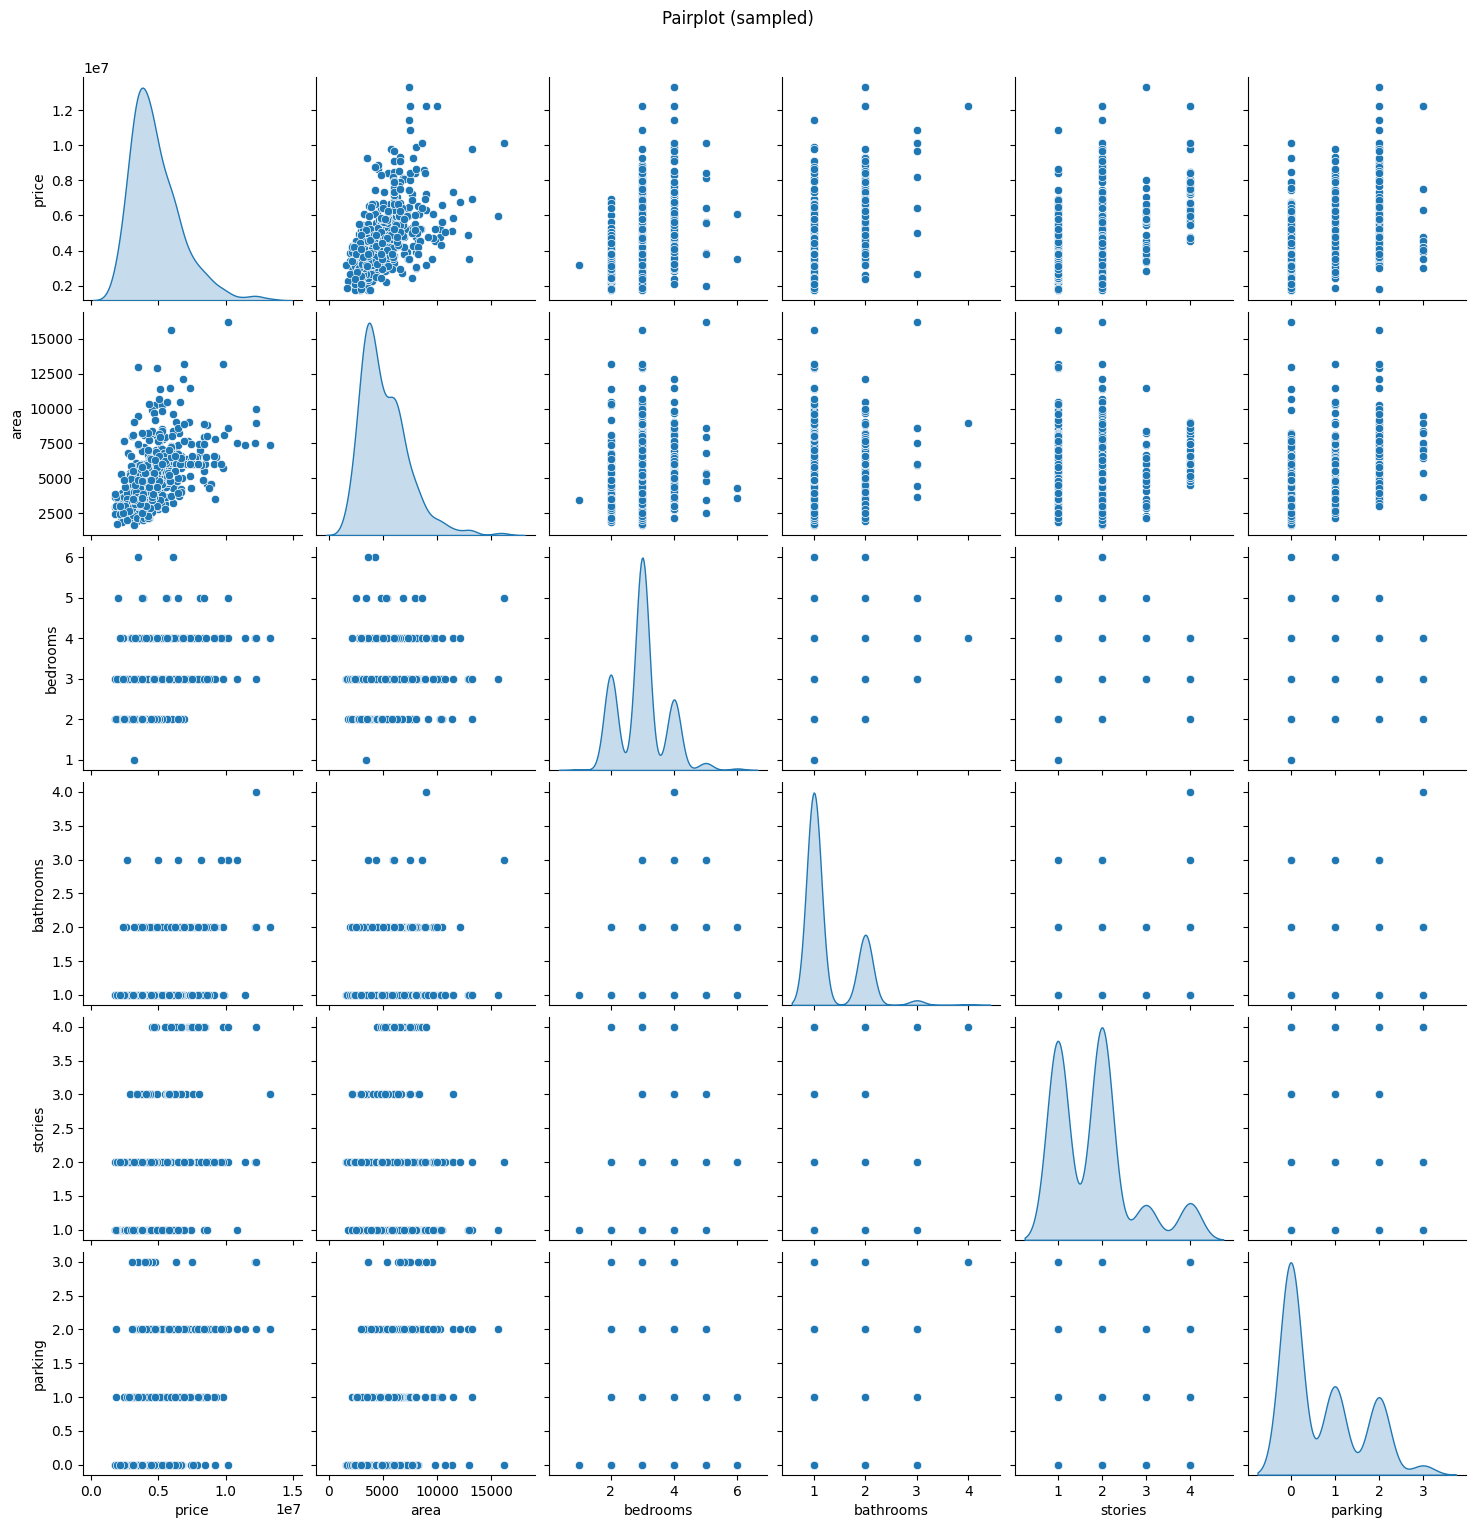

In [17]:
# Pairplot (sample numeric columns to keep it fast)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sample_cols = numeric_cols[:6] + [target] if target not in numeric_cols[:6] else numeric_cols[:6]
sample_cols = list(dict.fromkeys(sample_cols))  # unique
if len(sample_cols) > 1:
    sns.pairplot(df[sample_cols].dropna().sample(min(500, len(df))), diag_kind='kde')
    plt.suptitle('Pairplot (sampled)', y=1.02)
    plt.show()

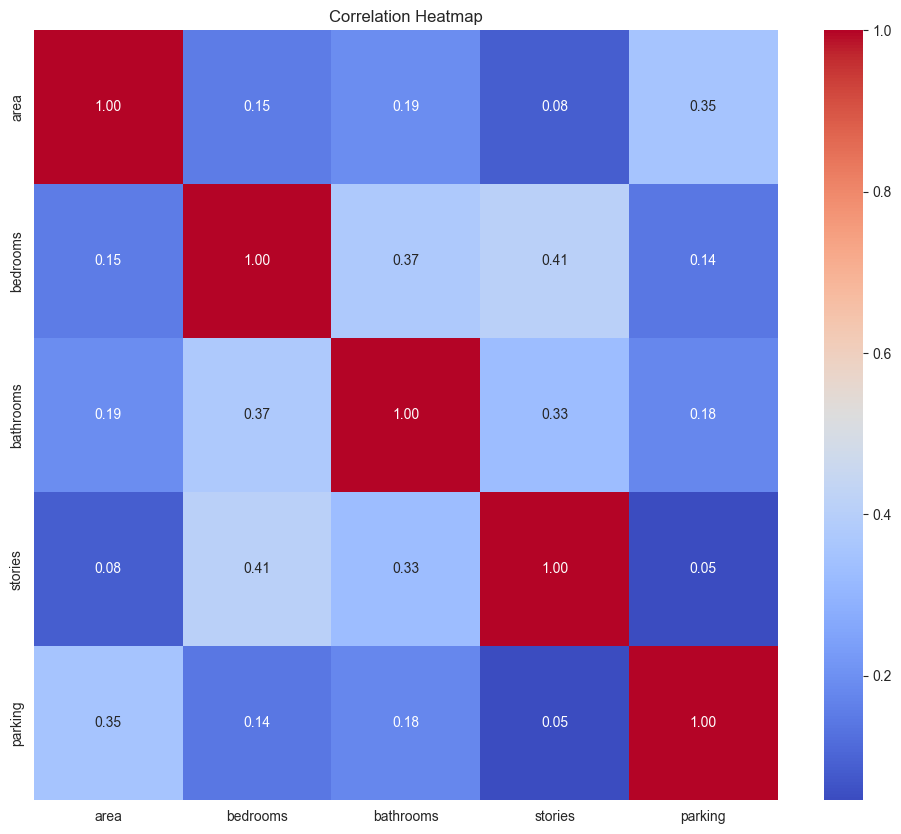

In [74]:

# Correlation heatmap
numeric_df = X.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [60]:
# Data cleaning & preprocessing decisions ===
# - Handle missing values
# - Encode categorical variables
# - Scale numeric features
# We'll build a pipeline to keep reproducible.

# Identify feature types
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target in num_features:
    num_features.remove(target)
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical features:", num_features[:10], " ...")
print("Categorical features:", cat_features)

Numerical features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  ...
Categorical features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [24]:
# Simple imputation strategies:
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# For categorical: fill with 'Missing' then one-hot encode (if many categories, consider target encoding)
if len(cat_features) > 0:
    cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
else:
    cat_transformer = None
    # Column transformer
transformers = []
transformers.append(('num', num_transformer, num_features))
if cat_transformer is not None:
    transformers.append(('cat', cat_transformer, cat_features))

preprocessor = ColumnTransformer(transformers=transformers)

# Build a baseline pipeline with LinearRegression
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [59]:
#  REGULARIZATION: RIDGE & LASSO
ridge = Pipeline(steps=[("preprocessor", preprocessor), ("ridge", Ridge())])
lasso = Pipeline(steps=[("preprocessor", preprocessor), ("lasso", Lasso(max_iter=5000))])

param_ridge = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}
param_lasso = {"lasso__alpha": [0.001, 0.01, 0.1, 1, 10]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs_ridge = GridSearchCV(ridge, param_ridge, cv=cv, scoring="r2", n_jobs=-1).fit(X_train, y_train)
gs_lasso = GridSearchCV(lasso, param_lasso, cv=cv, scoring="r2", n_jobs=-1).fit(X_train, y_train)

print("Best Ridge Params:", gs_ridge.best_params_)
print("Best Lasso Params:", gs_lasso.best_params_)

print("Ridge Metrics:", regression_metrics(y_test, gs_ridge.predict(X_test)))
print("Lasso Metrics:", regression_metrics(y_test, gs_lasso.predict(X_test)))


Best Ridge Params: {'ridge__alpha': 10}
Best Lasso Params: {'lasso__alpha': 0.01}
Ridge Metrics: {'MAE': 975644.6087441467, 'MSE': 1777303012708.8525, 'RMSE': np.float64(1333155.2845444721), 'R2': 0.6483770279008677}
Lasso Metrics: {'MAE': 970043.4199743231, 'MSE': 1754318731758.9912, 'RMSE': np.float64(1324506.976863086), 'R2': 0.6529242554255845}


In [58]:
#  Split data into train-test sets ===
X = df.drop(columns=[target])
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train/test shapes:", X_train.shape, X_test.shape)

Train/test shapes: (436, 12) (109, 12)


In [57]:
#  Fit baseline Linear Regression model ===
print(df.columns.tolist())
X = df[["area"]]   # make sure 'area' is a real column
y = df["price"]    # make sure 'price' is the target
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()



['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [27]:
# Evaluation metrics
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

metrics = regression_metrics(y_test, y_pred)
print("\nBaseline Linear Regression metrics on test set:")
for k,v in metrics.items():
    print(f"{k}: {v:.4f}")



Baseline Linear Regression metrics on test set:
MAE: 970043.4039
MSE: 1754318687330.6692
RMSE: 1324506.9601
R2: 0.6529


In [68]:
#  Coefficients interpretation (for numeric features) ===
# We need feature names after preprocessing (one-hot expands cat features)
preprocessor.fit(X_train)  # fit to get transformers' feature names
# get feature names helper
def get_feature_names(column_transformer):
    feature_names = []
    for name, trans, cols in column_transformer.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, 'named_steps') and 'onehot' in trans.named_steps:
            ohe = trans.named_steps['onehot']
            cols_trans = ohe.get_feature_names_out(cols)
            feature_names.extend(cols_trans.tolist())
        elif hasattr(trans, 'named_steps') and 'scaler' in trans.named_steps:
            feature_names.extend(cols)
        elif trans == 'passthrough':
            feature_names.extend(cols)
        else:
            # fallback
            try:
                feature_names.extend(cols)
            except:
                pass
    return feature_names

feature_names = get_feature_names(preprocessor)
coef = baseline_pipeline.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})
coef_df = coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index)
display(coef_df.head(20))

,feature,coefficient
0,area,529330.603637
2,bathrooms,495817.709085
13,airconditioning_no,-432479.155659
14,airconditioning_yes,432479.155659
11,hotwaterheating_no,-427723.572699
12,hotwaterheating_yes,427723.572699
3,stories,390748.265675
15,prefarea_no,-325771.899932
16,prefarea_yes,325771.899932
19,furnishingstatus_unfurnished,-258708.050778


In [70]:
# Multicollinearity check (VIF) on numeric features (pre-imputation)
# VIF requires no NaNs and numeric-only.
num_df = df[num_features].copy()
num_df = num_df.fillna(num_df.median())
# Add constant for statsmodels (not strictly required for VIF, but keeps shape)
vif_data = pd.DataFrame()
vif_data['feature'] = num_df.columns
vif_data['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]
print("\nVIF for numeric features:")
display(vif_data.sort_values('VIF', ascending=False).head(20))


VIF for numeric features:


,feature,VIF
1,bedrooms,13.652525
2,bathrooms,9.155151
0,area,6.737363
3,stories,6.683602
4,parking,1.901606


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.16e-97
Time:                        11:16:18   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.232e+06   3.23e+04     38.177      0.0

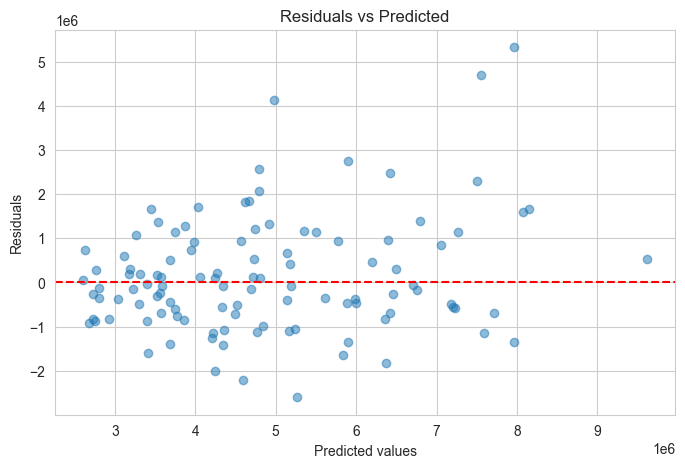

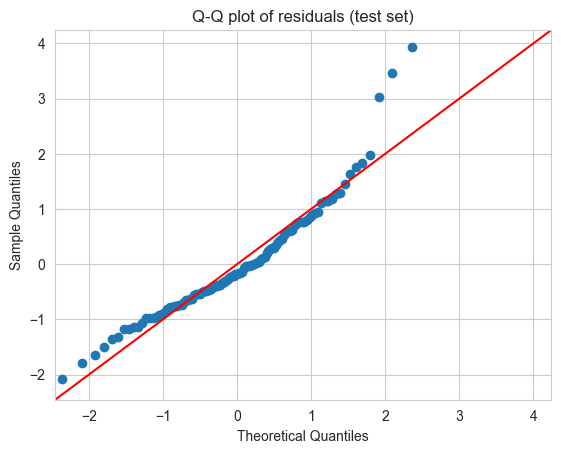


Breusch-Pagan test (stat, pval, fval, f_pval):


{'Lagrange multiplier statistic': np.float64(9.529318842724866),
 'p-value': np.float64(0.002022151578324879),
 'f-value': np.float64(10.250629676089096),
 'f p-value': np.float64(0.0017994788594304415)}

In [69]:
# Residual diagnostics (assumptions) using statsmodels OLS for train set ===
# We'll fit OLS on transformed (scaled) train features for diagnostics
X_train_t = preprocessor.transform(X_train)
# Add constant
X_train_sm = sm.add_constant(X_train_t)
ols = sm.OLS(y_train, X_train_sm).fit()
print(ols.summary())

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# Q-Q plot for residual normality
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of residuals (test set)')
plt.show()

# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, sm.add_constant(y_pred))
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test (stat, pval, fval, f_pval):")
display(dict(zip(bp_labels, bp_test)))


In [34]:
# === 9) Try Regularized models (Ridge and Lasso) + CV for hyperparameter tuning ===
# Create pipelines for ridge and lasso
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('ridge', Ridge())])
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('lasso', Lasso(max_iter=5000))])

# Grid search for alpha
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
gs_ridge.fit(X_train, y_train)
print("Best Ridge alpha:", gs_ridge.best_params_, "Best CV MSE:", -gs_ridge.best_score_)

gs_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
gs_lasso.fit(X_train, y_train)
print("Best Lasso alpha:", gs_lasso.best_params_, "Best CV MSE:", -gs_lasso.best_score_)

# Evaluate best models on test set
best_ridge = gs_ridge.best_estimator_
best_lasso = gs_lasso.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

print("\nRidge test metrics:")
for k,v in regression_metrics(y_test, y_pred_ridge).items():
    print(f"{k}: {v:.4f}")
print("\nLasso test metrics:")
for k,v in regression_metrics(y_test, y_pred_lasso).items():
    print(f"{k}: {v:.4f}")

# Cross-validated R2 of the baseline and best ridge
cv_scores_baseline = cross_val_score(baseline_pipeline, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
cv_scores_ridge = cross_val_score(best_ridge, X_train, y_train, cv=cv, scoring='r2', n_jobs=-1)
print("\nCV R2 - Baseline:", cv_scores_baseline.mean(), "Ridge:", cv_scores_ridge.mean())

Best Ridge alpha: {'ridge__alpha': 10} Best CV MSE: 1046855343858.8447
Best Lasso alpha: {'lasso__alpha': 0.0001} Best CV MSE: 1050105539026.7327

Ridge test metrics:
MAE: 975644.6087
MSE: 1777303012708.8525
RMSE: 1333155.2845
R2: 0.6484

Lasso test metrics:
MAE: 970043.4041
MSE: 1754318687758.3291
RMSE: 1324506.9603
R2: 0.6529

CV R2 - Baseline: 0.6490343335414054 Ridge: 0.6508026759540625


In [35]:
# === 10) Final model selection & saving ===
# Choose the model with better test R2 or lower test RMSE (here we pick ridge if it improves)
final_model = best_ridge if r2_score(y_test, y_pred_ridge) >= r2_score(y_test, y_pred) else baseline_pipeline
print("\nSelected final model:", final_model.named_steps if isinstance(final_model, Pipeline) else final_model)

# Fit final model on full data (recommended) and save
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
# If final_model is ridge pipeline, reuse it
if hasattr(final_model, 'named_steps') and 'ridge' in final_model.named_steps:
    final_pipeline = best_ridge
else:
    final_pipeline = baseline_pipeline

# Fit on entire dataset
final_pipeline.fit(X, y)
joblib.dump(final_pipeline, '/mnt/data/final_regression_model.joblib')
print("Saved final model to /mnt/data/final_regression_model.joblib")



Selected final model: {'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['area', 'bedrooms', 'bathrooms', 'stories',
                                  'parking']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['mainroad', 'guestroom

In [47]:
# Save after training
joblib.dump(final_model, "final_housing_model.joblib")
print("Model saved!")
# Load model
model = joblib.load("final_housing_model.joblib")

# Example: predict for first row
sample = X.iloc[[0]]
prediction = model.predict(sample)
print("Predicted value:", prediction[0])



Model saved!
Predicted value: 8203137.976786212


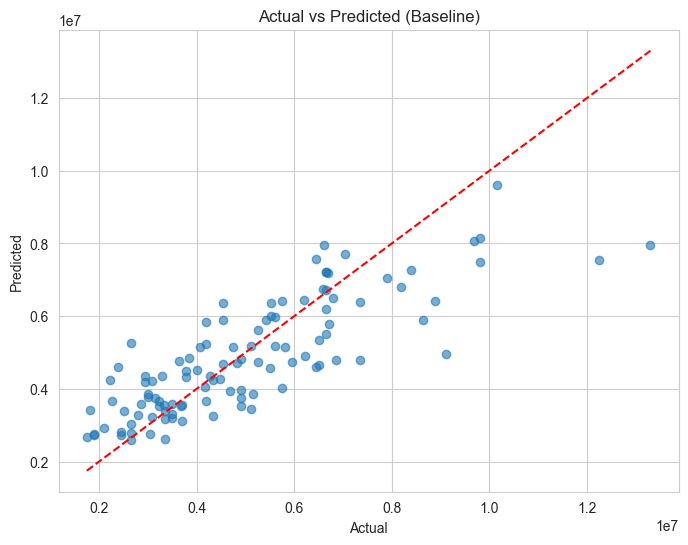

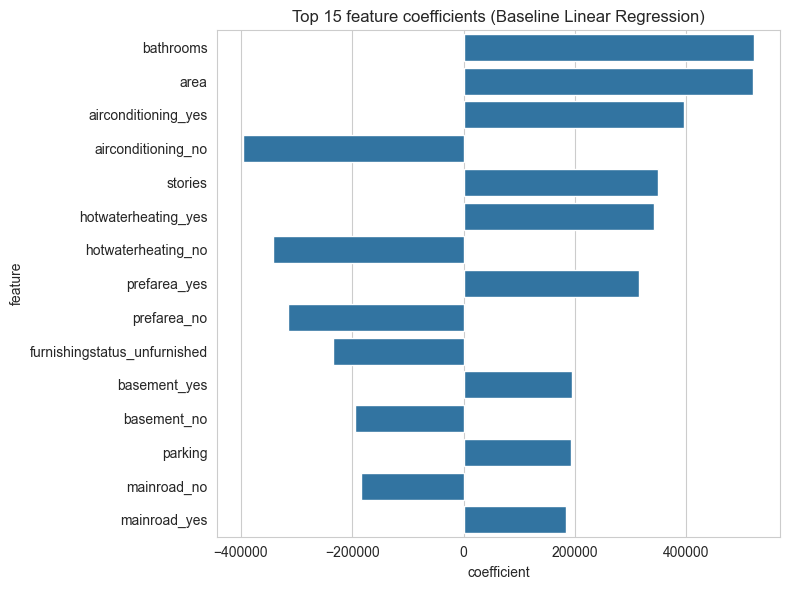

In [36]:
# === 11) Helpful plots for interview (actual vs predicted, top features) ===
# Actual vs Predicted (test set for the baseline)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Baseline)')
plt.show()

# Top coefficients (absolute)
coef_df['abs_coef'] = coef_df.coefficient.abs()
top_coef = coef_df.sort_values('abs_coef', ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x='coefficient', y='feature', data=top_coef)
plt.title('Top 15 feature coefficients (Baseline Linear Regression)')
plt.tight_layout()
plt.show()